# Training YOLOv8 Model on Custom Boat Dataset

In [ ]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
"""
  ████
██    ██   Datature
  ██  ██   Powering Breakthrough AI
    ██
 
@File    :   bytetrack_basketball.ipynb
@Author  :   Ben Le
@Version :   1.0
@Contact :   hello@datature.io
@License :   Apache License 2.0
@Desc    :   YOLOv8 training script on custom boat dataset.
"""

In [ ]:
!pip install ultralytics --quiet

## OR

# git clone https://github.com/ultralytics/ultralytics
# cd ultralytics
# pip install -e ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.0/262.0 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%cd drive/MyDrive/Datature/YOLOv8

Mounted at /content/drive
/content/drive/MyDrive/Datature/YOLOv8


In [ ]:
import os
HOME = os.getcwd()
print(HOME)
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/166.8 GB disk)


## Prepare Images and Annotations

For a YOLO Object Detection model, each .png/.jpg image requires a .txt annotation file with the same filename in the same directory. Each annotation file has one or several lines, each contains a bounding box annotation with the format  `<class> <x> <y> <w> <h>`. 

`<x> <y> <w> <h>`: Bounding box size and location with x and y being center coordinates while w and h are the width and height of the bounding box

`<class>`: The class index to be assigned to each bounding box ranging from 0 to num_classes - 1. For our custom dataset, we are detecting a single class boat , hence we only have one class index 0.

We used Datature Nexus to perform bounding box annotations. Nexus supports several types of annotation formats including YOLO format.


## Training Model

### Train using CLI

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=./datasets/boat.yaml imgsz=800 batch=8 epochs=50 plots=True

Ultralytics YOLOv8.0.21 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=./datasets/boat.yaml, epochs=50, patience=50, batch=8, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17,

### Train using Python SDK

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="./datasets/boat.yaml", imgsz=800, batch=8, epochs=50, plots=True)

Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=./datasets/boat.yaml, epochs=50, patience=50, batch=8, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17,

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

## Validate trained model on Validation dataset

In [ ]:
!yolo task=detect mode=val model=./runs/detect/train/weights/best.pt data=./datasets/boat.yaml conf=0.5

Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Datature/YOLOv8/datasets/val.cache... 151 images, 0 backgrounds, 0 corrupt: 100% 151/151 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:04<00:00,  2.09it/s]
                   all        151        249      0.881      0.799      0.869      0.673
Speed: 3.7ms pre-process, 13.1ms inference, 0.0ms loss, 2.1ms post-process per image


### Evaluate Training and Validation Performance progress


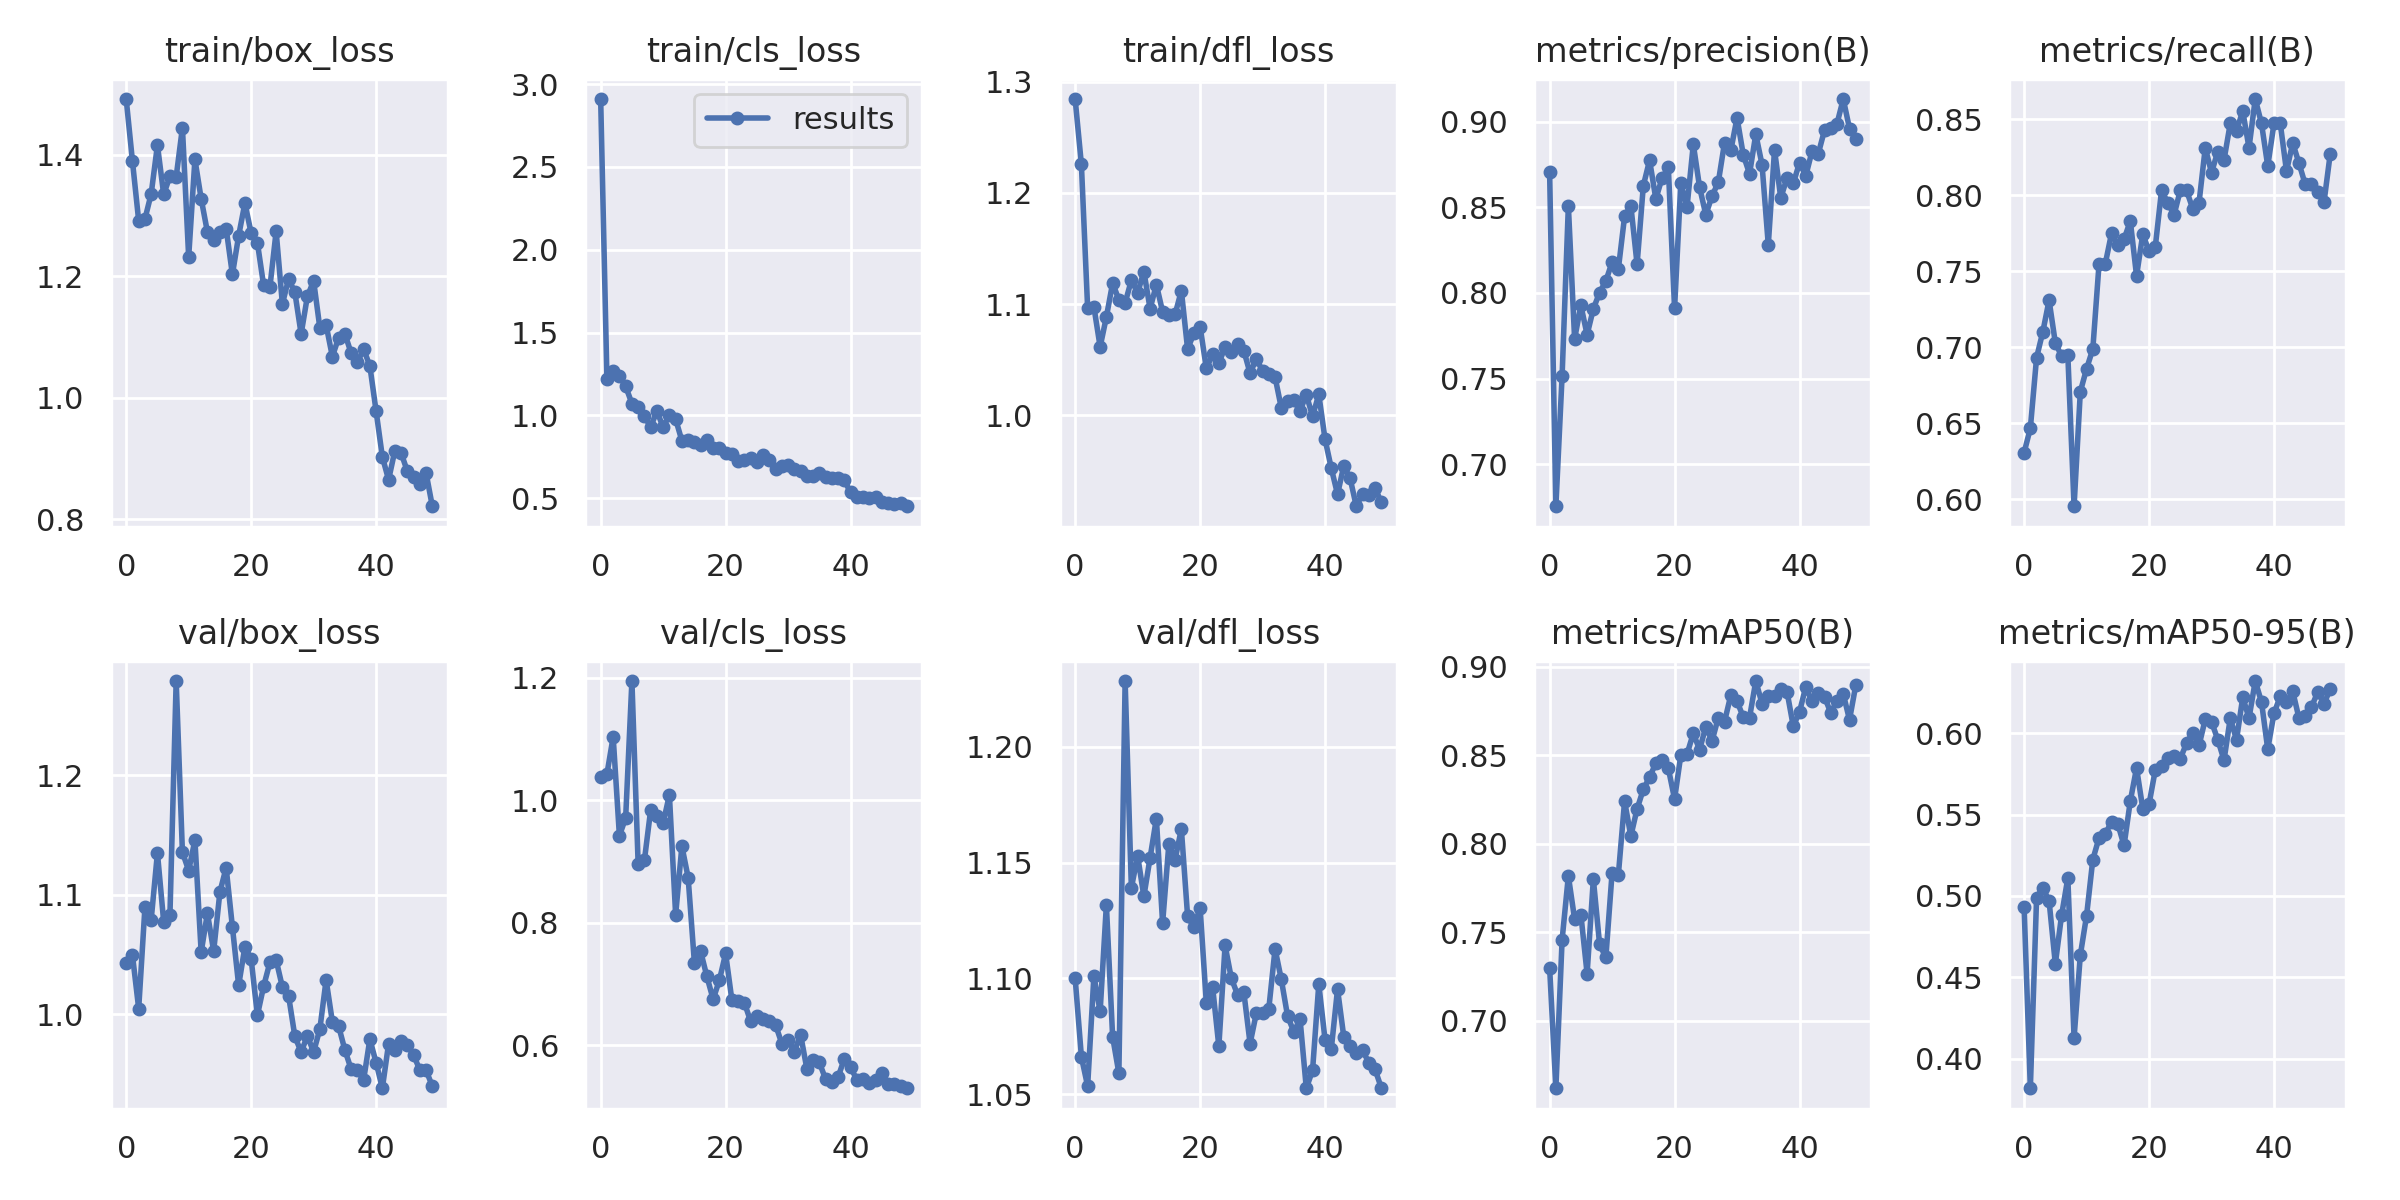

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', height=800)

### Confusion Matrix

The confusion matrix gives a good idea of how the YOLO model performs on detecting boat images.

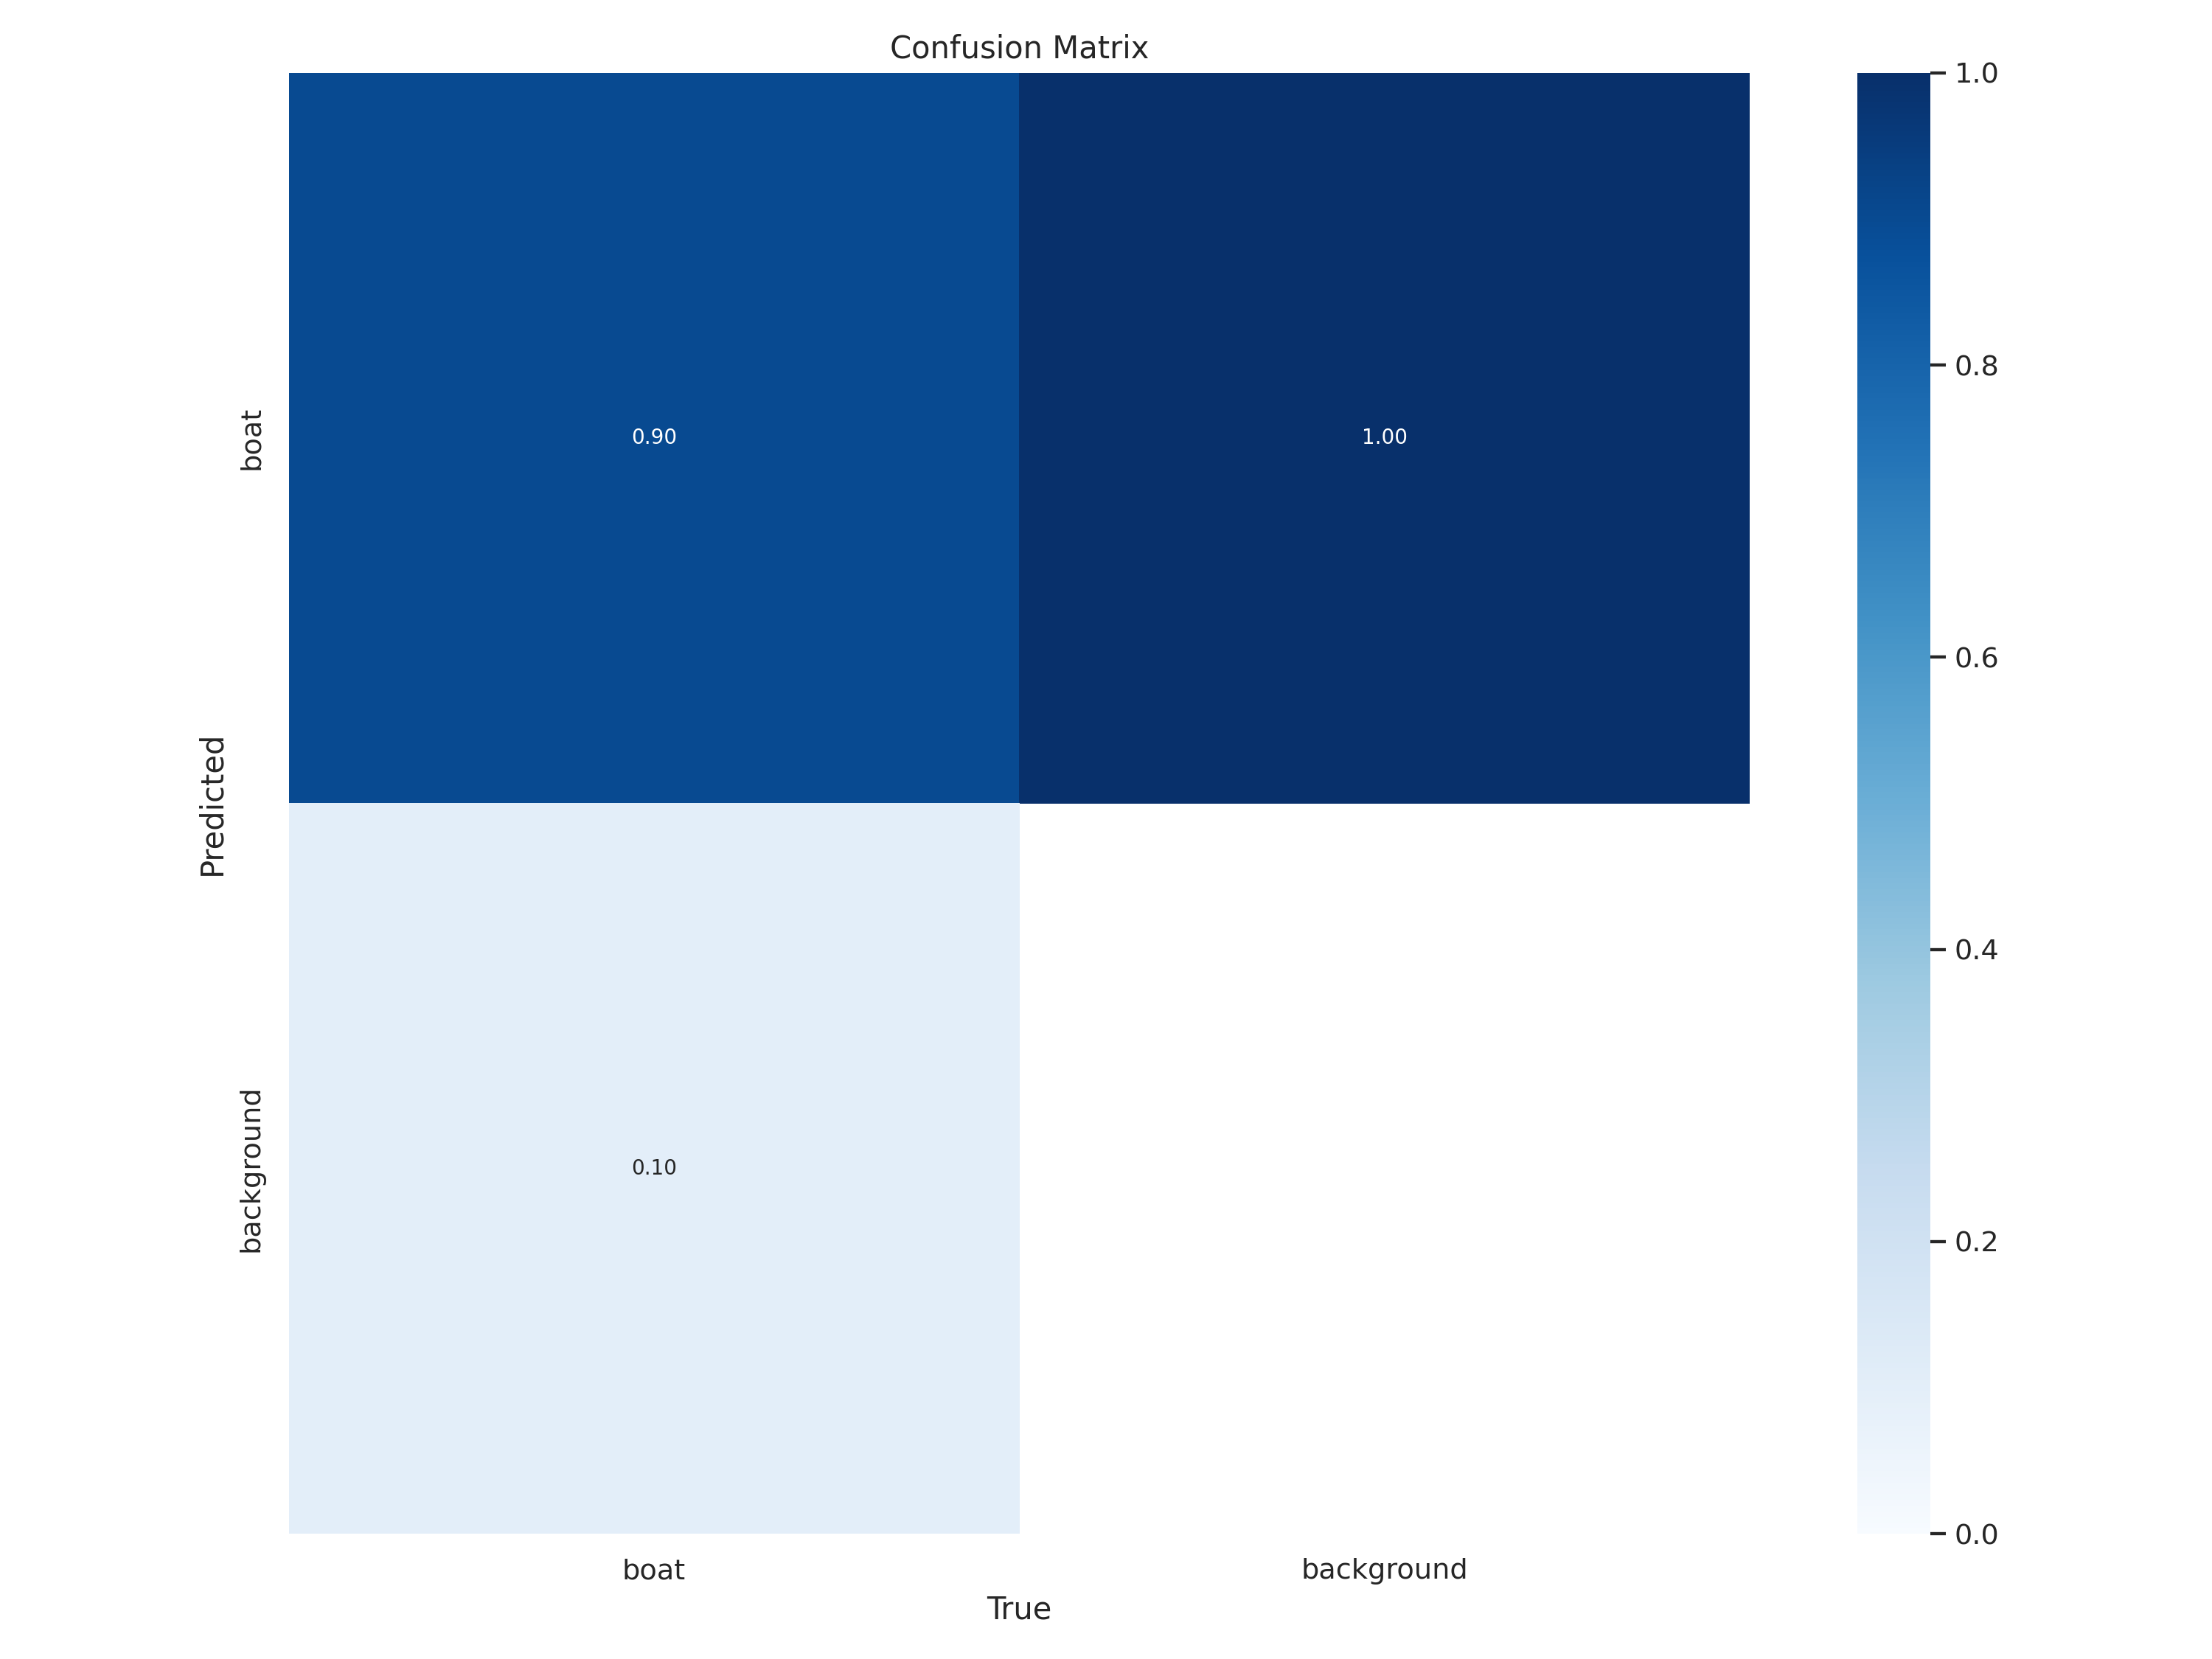

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

## Inference

### Using CLI

Inference can be done in CLI by setting **mode=predict** and specifying the model checkpoint and inference data folders/images to load for prediction. The inference outputs are images with annotated bounding boxes.

In [ ]:
!yolo task=detect mode=predict model=./runs/detect/train/weights/best.pt conf=0.4 source=./datasets/val/ save=True

Ultralytics YOLOv8.0.21 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/151 /content/drive/MyDrive/Datature/YOLOv8/datasets/val/boat450.png: 768x800 1 boat, 22.7ms
image 2/151 /content/drive/MyDrive/Datature/YOLOv8/datasets/val/boat451.png: 800x800 2 boats, 26.1ms
image 3/151 /content/drive/MyDrive/Datature/YOLOv8/datasets/val/boat453.png: 800x800 2 boats, 25.2ms
image 4/151 /content/drive/MyDrive/Datature/YOLOv8/datasets/val/boat454.png: 800x800 1 boat, 45.1ms
image 5/151 /content/drive/MyDrive/Datature/YOLOv8/datasets/val/boat455.png: 768x800 1 boat, 19.7ms
image 6/151 /content/drive/MyDrive/Datature/YOLOv8/datasets/val/boat456.png: 768x800 1 boat, 19.0ms
image 7/151 /content/drive/MyDrive/Datature/YOLOv8/datasets/val/boat457.png: 768x800 1 boat, 19.0ms
image 8/151 /content/drive/MyDrive/Datature/YOLOv8/datasets/val/boat458.png: 512x800 3 boats, 15.3ms
image 9/151 /content/drive/My

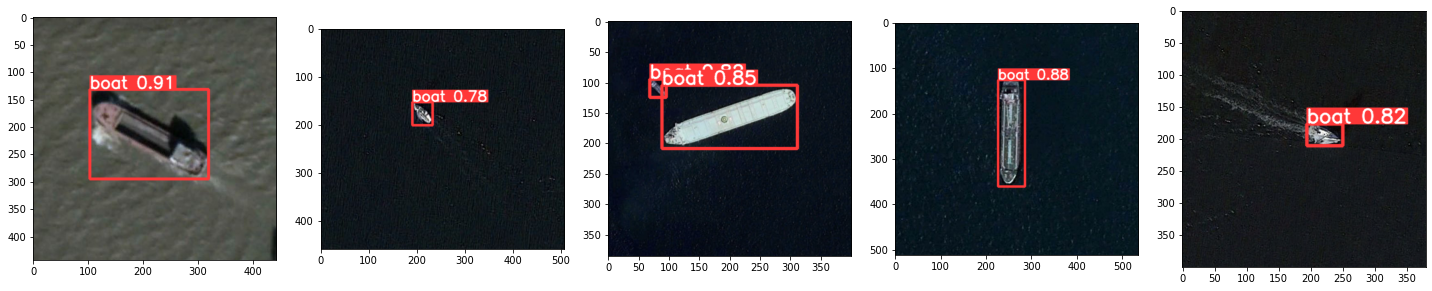

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image as PILImage

plt.figure(figsize = (20, 50))
for i in range(5):
    plt.subplot(1,5,i+1)
    sample_path = random.choice(os.listdir("./runs/detect/predict5"))
    img = PILImage.open("./runs/detect/predict5/" + sample_path)
    plt.imshow(img)

plt.tight_layout()

### Using Python SDK

Inference can also be done using Python SDK. Prediction objects contain information such as bounding boxes, class probabilities and class indices.

In [ ]:
model = YOLO("./runs/detect/train/weights/best.pt")
results = model.predict(source="./datasets/val/boat562.png", conf=0.40)

Ultralytics YOLOv8.0.21 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/drive/MyDrive/Datature/YOLOv8/datasets/val/boat562.png: 800x800 1 boat, 25.7ms
Speed: 1.1ms pre-process, 25.7ms inference, 5.6ms postprocess per image at shape (1, 3, 800, 800)


In [ ]:
print("Bounding box coordinates:", results[0].boxes.xyxy)
print("Log probability of assigned class", results[0].boxes.conf)
print("Assigned class:", results[0].boxes.cls)

Bounding box coordinates: tensor([[134.,  90., 305., 262.]], device='cuda:0')
Log probability of assigned class tensor([0.92961], device='cuda:0')
Assigned class: tensor([0.], device='cuda:0')


### Inference on video stream

In [ ]:
!yolo task=detect mode=predict model=./runs/detect/train/weights/best.pt conf=0.4 source=./datasets/aerial_view_ships.mp4 save=True

Ultralytics YOLOv8.0.21 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/391) /content/drive/MyDrive/Datature/YOLOv8/datasets/aerial_view_ships.mp4: 480x800 10 boats, 21.8ms
video 1/1 (2/391) /content/drive/MyDrive/Datature/YOLOv8/datasets/aerial_view_ships.mp4: 480x800 7 boats, 16.2ms
video 1/1 (3/391) /content/drive/MyDrive/Datature/YOLOv8/datasets/aerial_view_ships.mp4: 480x800 5 boats, 16.2ms
video 1/1 (4/391) /content/drive/MyDrive/Datature/YOLOv8/datasets/aerial_view_ships.mp4: 480x800 6 boats, 16.2ms
video 1/1 (5/391) /content/drive/MyDrive/Datature/YOLOv8/datasets/aerial_view_ships.mp4: 480x800 4 boats, 16.2ms
video 1/1 (6/391) /content/drive/MyDrive/Datature/YOLOv8/datasets/aerial_view_ships.mp4: 480x800 4 boats, 16.4ms
video 1/1 (7/391) /content/drive/MyDrive/Datature/YOLOv8/datasets/aerial_view_ships.mp4: 480x800 4 boats, 16.2ms
video 1/1 (8/391) /content/drive/MyDrive